# Logistic Regression Grid Search

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.5)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [49]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_auc_score

In [3]:
# loads in dataframe as df
df = pd.read_csv('/Users/tomjones/Documents/determining shot project/modelling.csv')

In [4]:
y = df.pop('shot_outcome') # set target variable (shot_outcome) y and removes from df
X = df # sets rest of dataframe as x

In [5]:
# creates test train split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                        stratify=y, test_size=0.3, random_state=1)

In [6]:
# standardises feature variables (x)
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

In [22]:
# create logistic regression model
lr_gs = LogisticRegression(max_iter = 100000)
# create params grid
params_gs = {'penalty': ['elasticnet'],
             "l1_ratio": np.arange(0.0, 1.2, 0.2),
             'solver': [ 'saga'],
             'C': np.logspace(-0.5, 0.5, 5),
             'multi_class': ['ovr', 'multinomial']}
# create gridsearch
lr_gs = GridSearchCV(lr_gs, params_gs, n_jobs = -1, cv = 5, verbose = 3)
# fit gridsearch on training data
lr_gs.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed: 114.9min
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed: 850.2min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed: 2091.8min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 2337.1min finished


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=100000), n_jobs=-1,
             param_grid={'C': array([0.31622777, 0.56234133, 1.        , 1.77827941, 3.16227766]),
                         'l1_ratio': array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
                         'multi_class': ['ovr', 'multinomial'],
                         'penalty': ['elasticnet'], 'solver': ['saga']},
             verbose=3)

In [23]:
print('Best Parameters:')
print(lr_gs.best_params_)
print('Best estimator C:')
print(lr_gs.best_estimator_.C)
print('Best estimator mean cross validated training score:')
print(lr_gs.best_score_)
print('Best estimator score on the full training set:')
print(lr_gs.score(X_train, y_train))
print('Best estimator score on the test set:')
print(lr_gs.score(X_test, y_test))
print('Best estimator coefficients:')
print(lr_gs.best_estimator_.coef_)

Best Parameters:
{'C': 0.31622776601683794, 'l1_ratio': 1.0, 'multi_class': 'multinomial', 'penalty': 'elasticnet', 'solver': 'saga'}
Best estimator C:
0.31622776601683794
Best estimator mean cross validated training score:
0.9449516902005366
Best estimator score on the full training set:
0.9717734210358261
Best estimator score on the test set:
0.9459177592371871
Best estimator coefficients:
[[ 0.          0.         -0.00404373 ...  0.01780968 -0.09100163
   0.00743279]]


In [28]:
# saves model lr_gs
joblib.dump( lr_gs, 'logistic_reg_1.jlib')

['logistic_reg_1.jlib']

# Tuned Parameters

In [31]:
# create logistic regression model
lr_gs = LogisticRegression(max_iter = 100000)
# create params grid
params_gs2 = {'penalty': ['l1'],
             'solver': [ 'saga'],
             'C': np.logspace(-2, 2, 10),
             'multi_class': ['multinomial']}
# create gridsearch
lr_gs2 = GridSearchCV(lr_gs, params_gs2, n_jobs = -1, cv = 5, verbose = 3)
# fit gridsearch on training data
lr_gs2.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed: 82.9min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 396.7min finished


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=100000), n_jobs=-1,
             param_grid={'C': array([1.00000000e-02, 2.78255940e-02, 7.74263683e-02, 2.15443469e-01,
       5.99484250e-01, 1.66810054e+00, 4.64158883e+00, 1.29154967e+01,
       3.59381366e+01, 1.00000000e+02]),
                         'multi_class': ['multinomial'], 'penalty': ['l1'],
                         'solver': ['saga']},
             verbose=3)

In [32]:
print('Best Parameters:')
print(lr_gs2.best_params_)
print('Best estimator C:')
print(lr_gs2.best_estimator_.C)
print('Best estimator mean cross validated training score:')
print(lr_gs2.best_score_)
print('Best estimator score on the full training set:')
print(lr_gs2.score(X_train, y_train))
print('Best estimator score on the test set:')
print(lr_gs2.score(X_test, y_test))
print('Best estimator coefficients:')
print(lr_gs2.best_estimator_.coef_)

Best Parameters:
{'C': 0.027825594022071243, 'multi_class': 'multinomial', 'penalty': 'l1', 'solver': 'saga'}
Best estimator C:
0.027825594022071243
Best estimator mean cross validated training score:
0.9529344424987547
Best estimator score on the full training set:
0.9607254613960023
Best estimator score on the test set:
0.9538140643623361
Best estimator coefficients:
[[ 0.          0.          0.         ...  0.00421221 -0.03862799
   0.        ]]


In [33]:
# saves model lr_gs2
joblib.dump( lr_gs2, 'logistic_reg_2.jlib')

['logistic_reg_2.jlib']

In [34]:
# reloads lr_gs2 as logistic_reg_2_reload
logistic_reg_2_reload = joblib.load('logistic_reg_2.jlib')

In [35]:
# creates dataframe of the coefficients and their absolute values 
# collect the model coefficients in a dataframe
df_coef = pd.DataFrame(lr_gs2.best_estimator_.coef_.T, index=X_train.columns,
                       columns=['coefficients'])
# calculate the absolute values of the coefficients
df_coef['coef_abs'] = df_coef.coefficients.abs()
df_coef.sort_values('coefficients')

,coefficients,coef_abs
pass_shot_assist_2nd,-1.528587,1.528587
pass_shot_assist_3rd,-1.455722,1.455722
area_of_goal_OFF_TARGET,-0.388496,0.388496
pass_height_name_2nd_None,-0.273982,0.273982
pass_height_name_3rd_None,-0.249452,0.249452
...,...,...
team_name_Barcelona,0.130387,0.130387
type_name_1st_Ball Receipt*,0.213381,0.213381
type_name_3rd_Pass,0.249452,0.249452
type_name_2nd_Pass,0.273982,0.273982


In [38]:
# creates a dataframe of the key feature variables with coefficients greater than 0.1 absolute 
df_key = df_coef[df_coef['coef_abs'] >= 0.1]

In [112]:
df_key = df_key.reset_index(drop=False)

In [118]:
df_key.rename(columns = {'index' : 'features'}, inplace = True)

In [126]:
df_key = df_key.sort_values('coefficients', ascending = False)

In [44]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve, classification_report, roc_auc_score

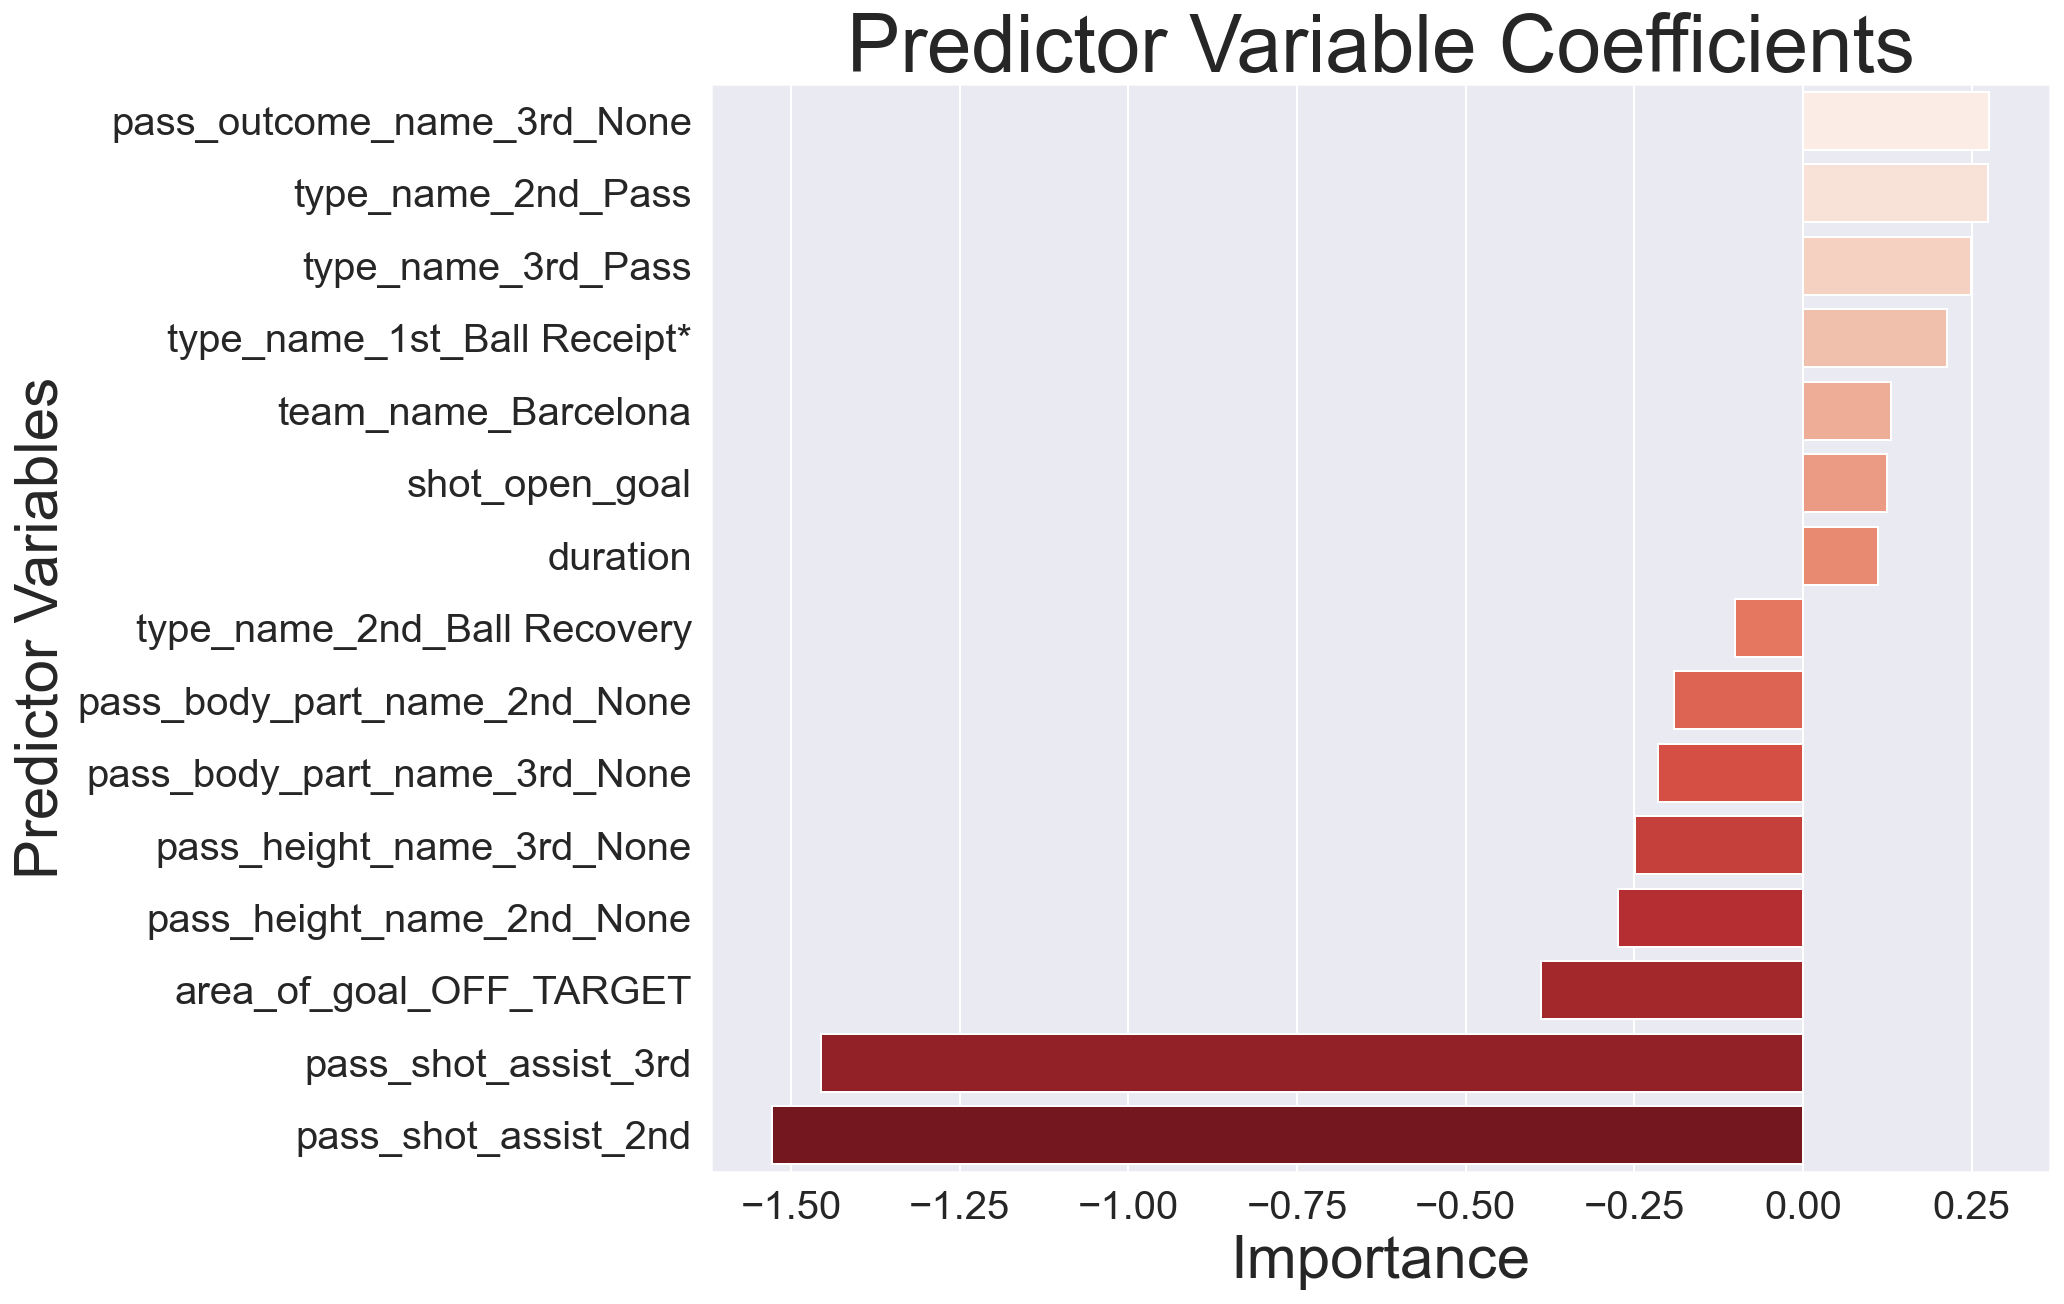

In [130]:
# plots bar plot of count per number of defenders in front of goal
fig, ax = plt.subplots(figsize=(12, 10))
ax = sns.barplot(y='features', x='coefficients', data=df_key, palette='Reds', orient = 'h')
ax.set_title("Predictor Variable Coefficients",fontsize=40)
ax.set_xlabel("Importance",fontsize=30)
ax.set_ylabel("Predictor Variables",fontsize=30) 
ax.tick_params(labelsize=20)
plt.show()


In [131]:
df_key_abs = df_key.sort_values('coef_abs', ascending = False)

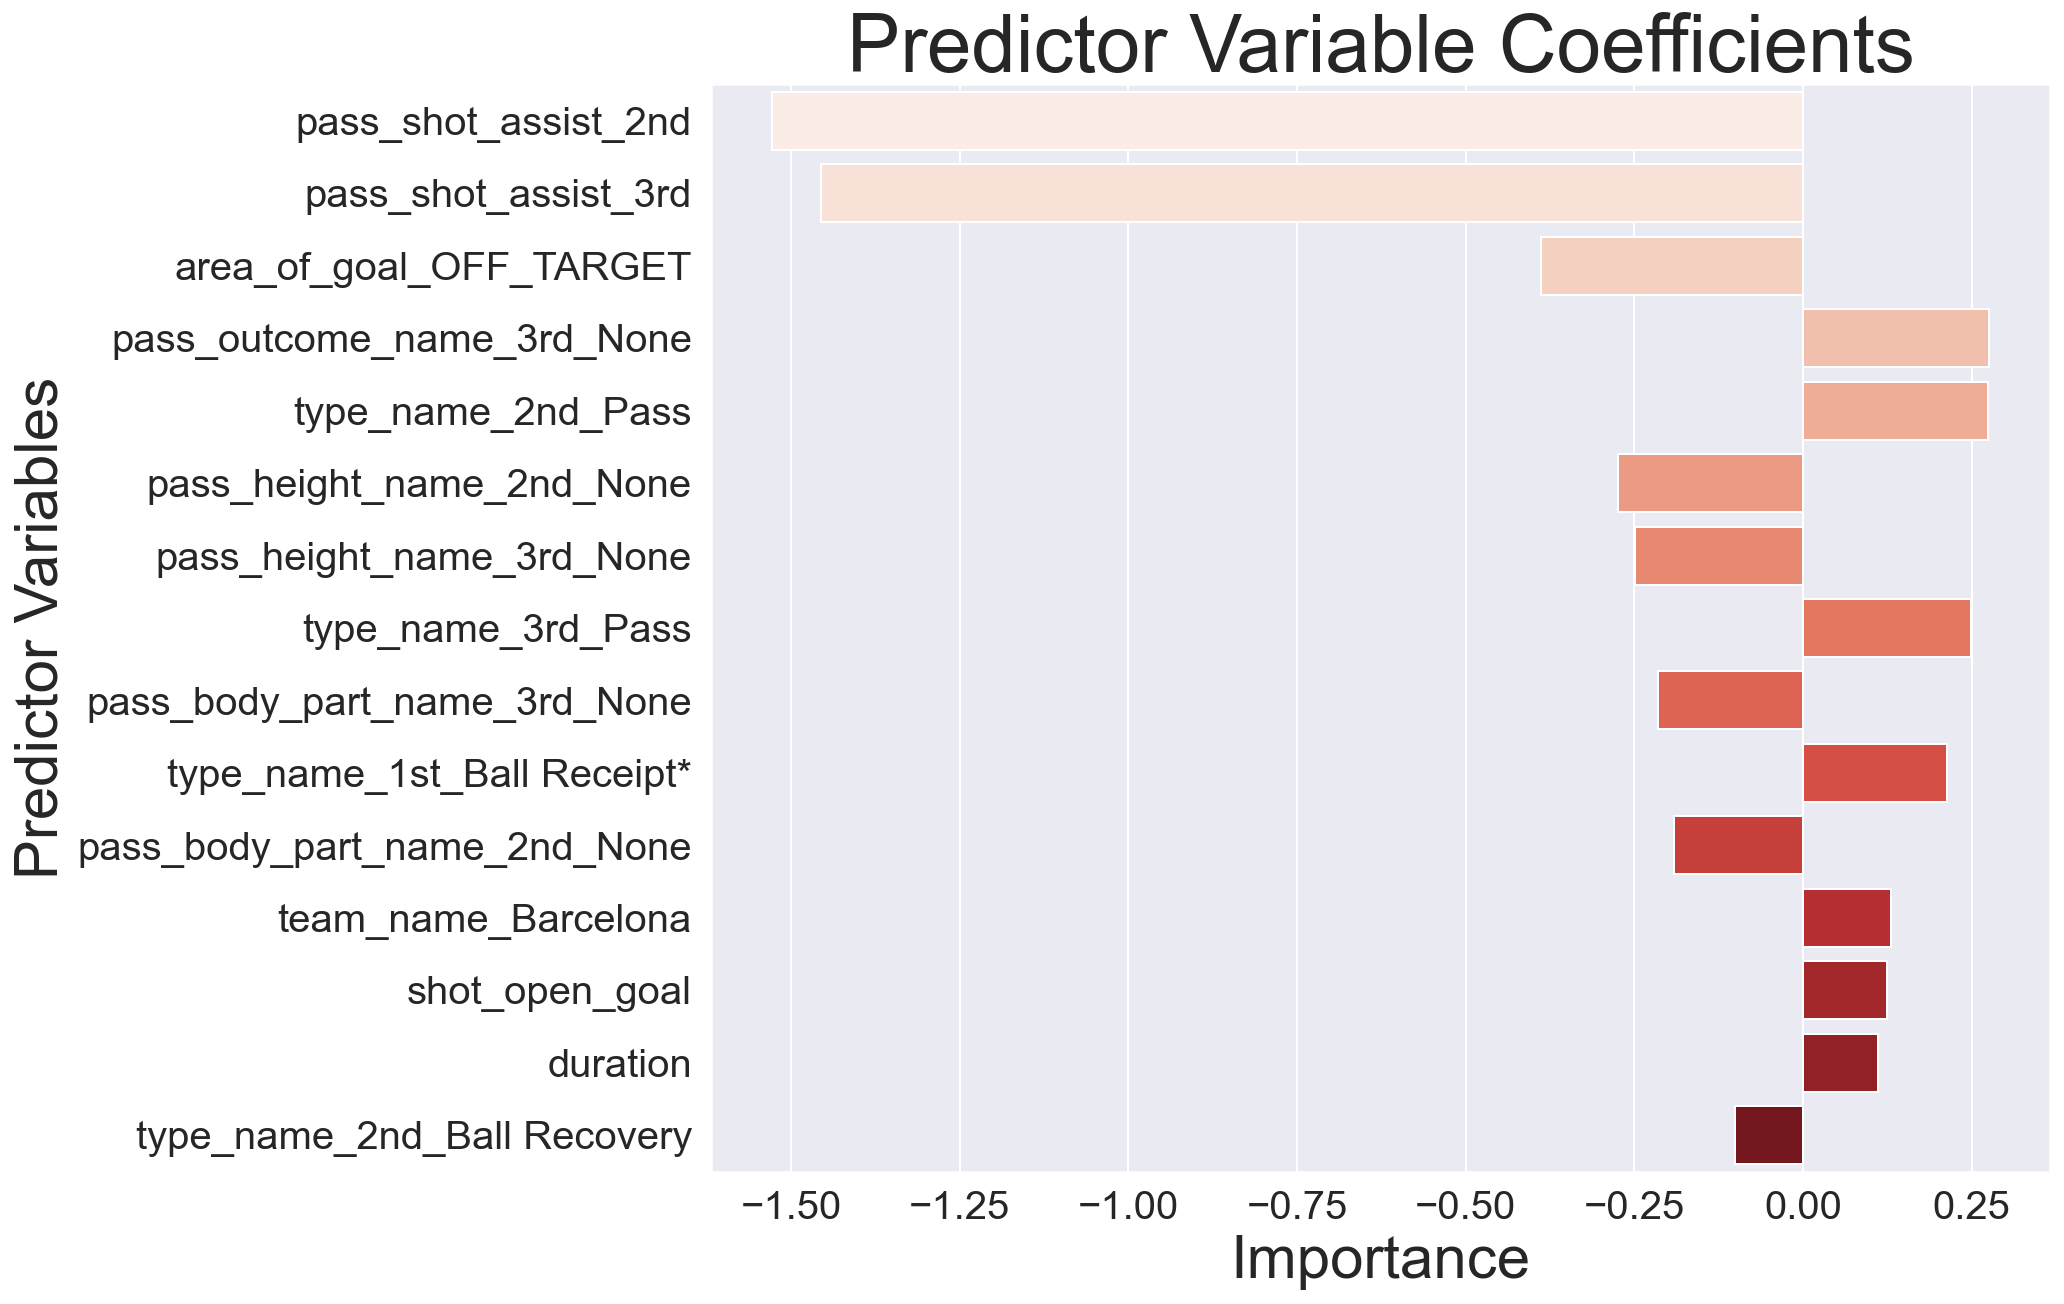

In [132]:
# plots bar plot of count per number of defenders in front of goal
fig, ax = plt.subplots(figsize=(12, 10))
ax = sns.barplot(y='features', x='coefficients', data=df_key_abs, palette='Reds', orient = 'h')
ax.set_title("Predictor Variable Coefficients",fontsize=40)
ax.set_xlabel("Importance",fontsize=30)
ax.set_ylabel("Predictor Variables",fontsize=30) 
ax.tick_params(labelsize=20)
plt.show()

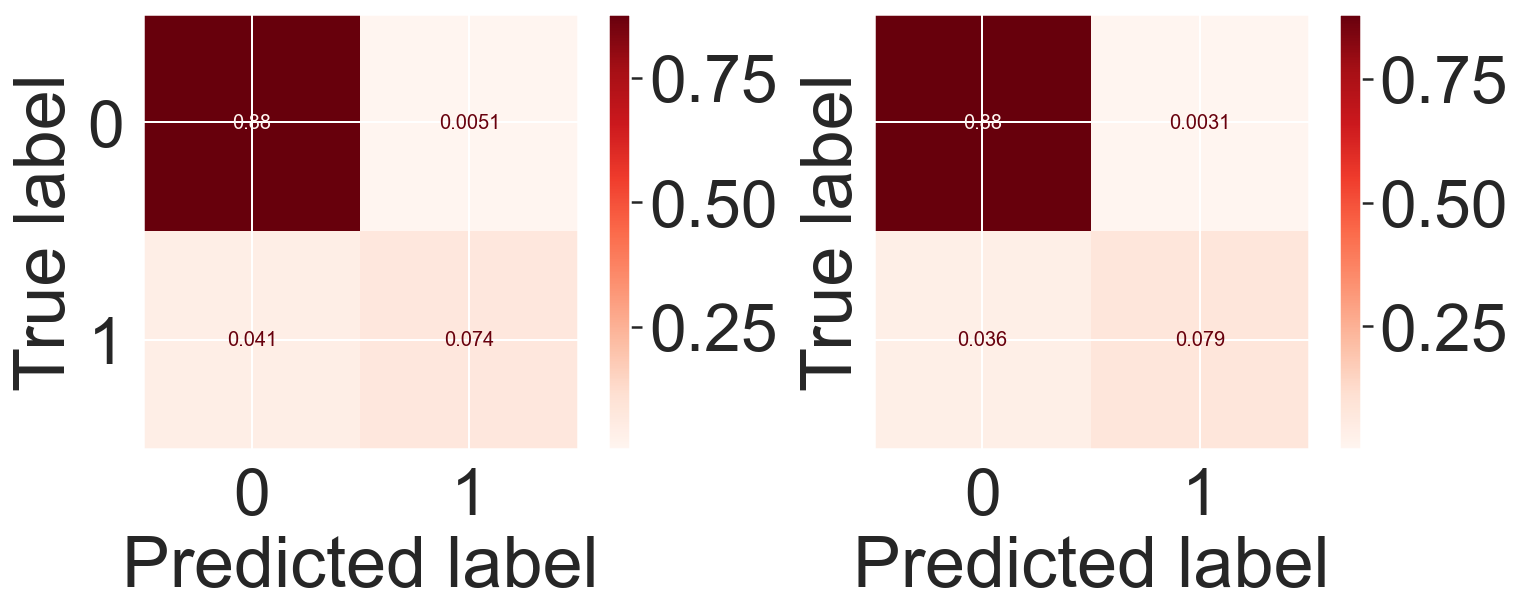

In [88]:
# plots confusion matrix for train and test sets
fig, ax = plt.subplots(ncols=2, figsize=(12, 4), sharey=True)
plot_confusion_matrix(lr_gs2, X_train, y_train, cmap='Reds', ax=ax[1], normalize='all')
plot_confusion_matrix(lr_gs2, X_test, y_test, cmap='Reds', ax=ax[0], normalize='all')

for a in ax:
    texts = a.texts
    for text in texts:
        text.set_size(10)

plt.show()

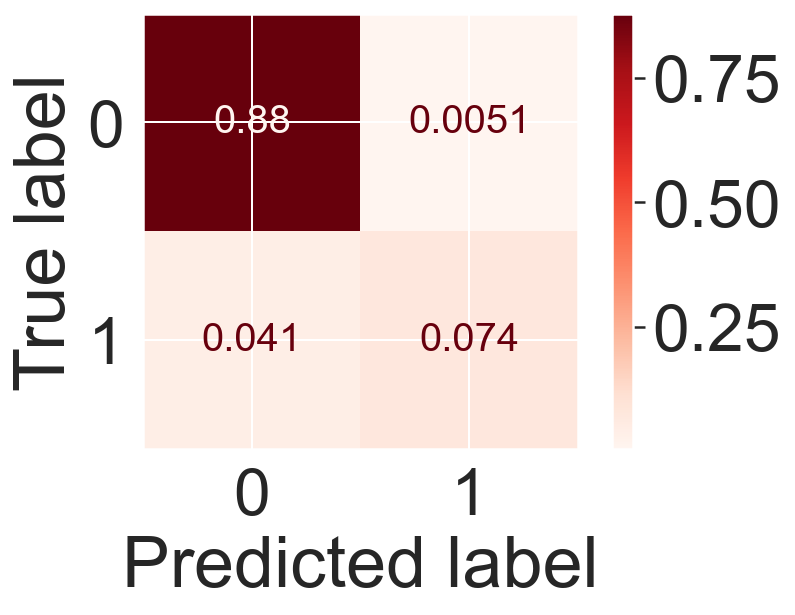

In [110]:
# confusion matrix test score 
plot_confusion_matrix(lr_gs2, X_test, y_test, cmap='Reds', normalize='all')

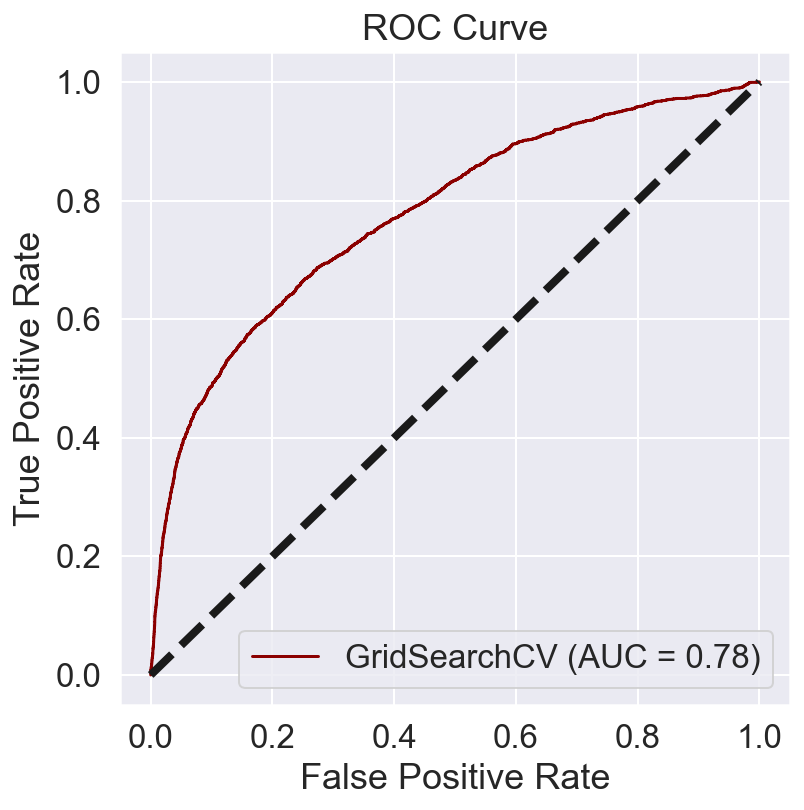

In [59]:
fig, ax = plt.subplots(figsize=(6, 6))
plot_roc_curve(lr_gs2, X, y, ax=ax, color = 'darkred')
ax.plot([0, 1], [0, 1], 'k--', linewidth=4)
ax.set(title='ROC Curve')
plt.show()

In [136]:

model_summary_3 = pd.DataFrame()
model_summary_3['Models'] = ['Logistic Regression', 'Gradient Boost Classifier',
                           'KNN', 'Decision_Tree', 'Random_Forest', 'Boot Strapping']
model_summary_3['Mean_CV_Scores'] = [0.9529344424987547, 0.905535824, 0.911651651,
                                     0.9266511665, 0.9382760876676481, 0.914948911851296]


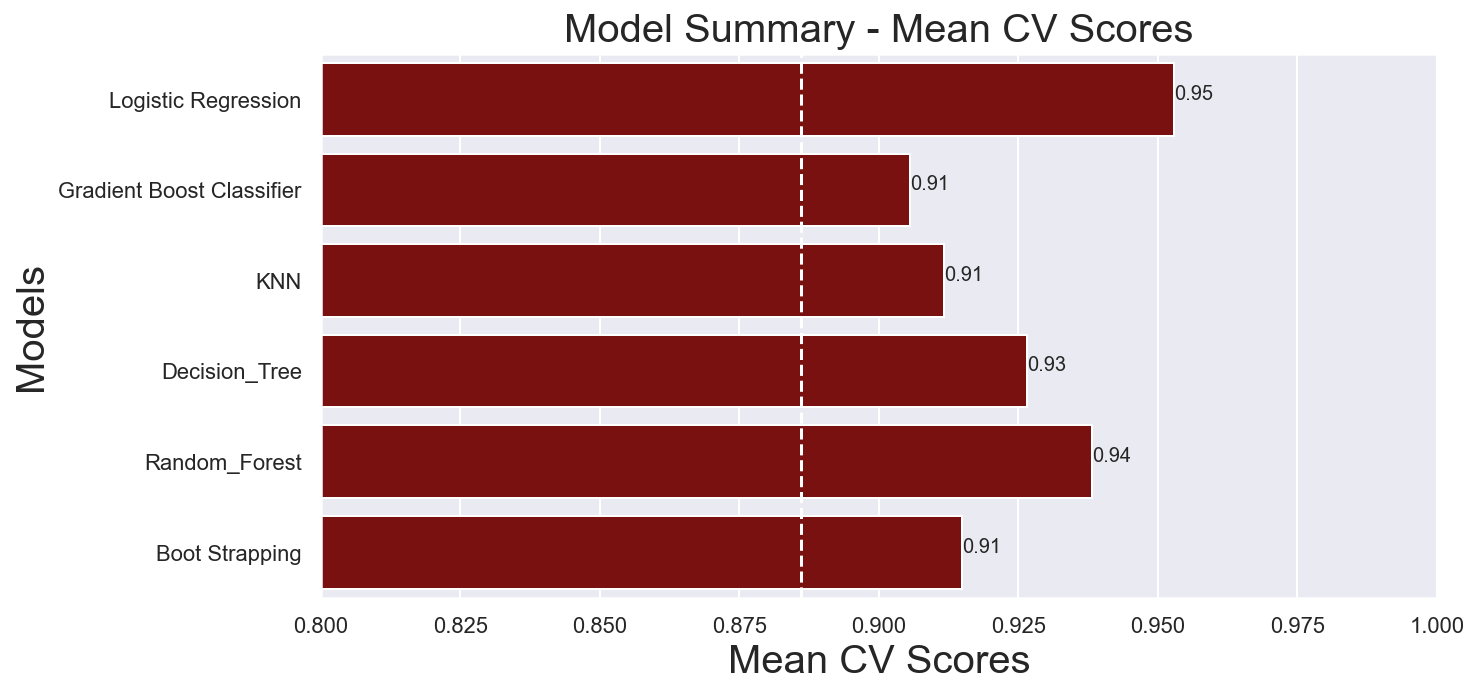

In [143]:
# plot horizontal barplot
threshold = 0.886
sns.set(rc={'figure.figsize':(10,5)})
ax = sns.barplot(x='Mean_CV_Scores', y='Models', data=model_summary_3, orient='h', color='darkred')
ax.set_title('Model Summary - Mean CV Scores', fontsize=20) # title barplot
plt.xlim(0.8, 1)
ax.set_xlabel("Mean CV Scores",fontsize=20)
ax.set_ylabel("Models",fontsize=20)
plt.axvline(x=0.886
, color='w', linestyle='--')
for i, xi in enumerate(model_summary_3['Mean_CV_Scores']):
   ax.annotate(round(xi,2), (xi,i), fontsize=10)